In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
# Load Data
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')

In [3]:
# fill missing values with mean column values
X_train_i = X_train.fillna(X_train.mean(), inplace=False)

In [4]:
# (optional) Generate polynomial features
# import numpy as np
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(2)
# X_train_i = poly.fit_transform(X_train_i)                             

In [5]:
# Normalize the data in a robust way
X_train_scaled = pd.DataFrame(preprocessing.robust_scale(X_train_i))

In [6]:
# Do PCA:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train_scaled)  
print(pca.explained_variance_ratio_)  

# It seems that the first component of PCA does not explain much variance

[0.12568212 0.05659651]


In [7]:
# Select K best and plot
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
X_train_best = SelectKBest(mutual_info_regression, k=8).fit_transform(X_train_scaled.as_matrix(), y_train.as_matrix()[:, 1])
X_train_best = pd.DataFrame(X_train_best)

In [8]:
# Plot
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

total = X_train_best.copy()
# Add y in there
total.insert(loc=8, column='y', value=y_train.iloc[:, 1])
g = sns.PairGrid(total, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw=3)

/Users/gabrielarpino/Library/Python/3.6/lib/python/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [9]:
# Do basic regression on the mutual information best columns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
reg = linear_model.LinearRegression()
reg.fit(X_train_best, y_train.iloc[:, 1])
reg.coef_
y_train_pred = reg.predict(X_train_best)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


MSE: 67.53782747533494
R2 score: 0.33


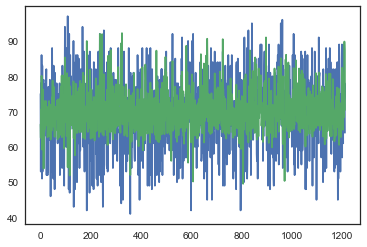

In [10]:
# Check how the regression on the training data looks like
plt.plot(y_train.iloc[:, 1])
plt.plot(y_train_pred)
print("MSE:", mean_squared_error(y_train.iloc[:, 1], y_train_pred))
print('R2 score: %.2f' % r2_score(y_train.iloc[:, 1], y_train_pred))

In [11]:
# Now do basic regression on the whole train set lmao
reg = linear_model.LinearRegression()
reg.fit(X_train_scaled, y_train.iloc[:, 1])
reg.coef_
y_train_pred = reg.predict(X_train_scaled)

MSE: 20.049692454230964
R2 score: 0.80


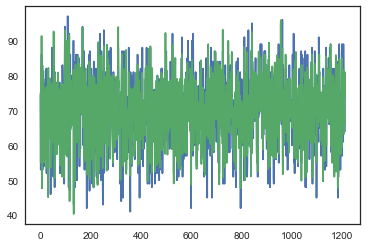

In [12]:
# Check how the regression on the training data looks like
plt.plot(y_train.iloc[:, 1])
plt.plot(y_train_pred)
print("MSE:", mean_squared_error(y_train.iloc[:, 1], y_train_pred))
print('R2 score: %.2f' % r2_score(y_train.iloc[:, 1], y_train_pred))

In [14]:
# Try with Lasso regression

from sklearn import linear_model
reg = linear_model.LassoCV()
reg.fit(X_train_scaled, y_train.iloc[:, 1])
reg.coef_
y_train_pred = reg.predict(X_train_scaled)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


MSE: 56.39768023763082
R2 score: 0.44


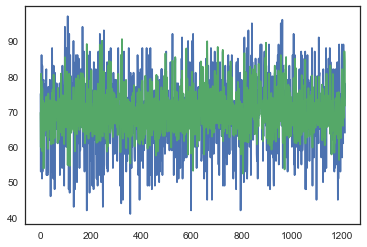

In [15]:
# Check how the regression on the training data looks like
plt.plot(y_train.iloc[:, 1])
plt.plot(y_train_pred)
print("MSE:", mean_squared_error(y_train.iloc[:, 1], y_train_pred))
print('R2 score: %.2f' % r2_score(y_train.iloc[:, 1], y_train_pred))

# The above shows that a linear regression on ALL the cleaned data is better than linear regression on only 8 best mutual information columns

In [ ]:
# Now, try with multiple polynomial features:
